In [2]:
import numpy as np

Solving Linear Equations

$$\begin{cases} 
-x_1+3x_2=7, \\ 3x_1+2x_2=1, \end{cases}\tag{1}$$

In [3]:
A = np.array([
        [-1, 3],
        [3, 2]
    ], dtype=np.dtype(float))

b = np.array([7, 1], dtype=np.dtype(float))

x = np.linalg.solve(A, b)

print(f"Solution: {x}")

Solution: [-1.  2.]


In [4]:
d = np.linalg.det(A)

print(f"Determinant of matrix A: {d:.2f}")

Determinant of matrix A: -11.00


In [5]:
import matplotlib.pyplot as plt

def plot_lines(M):
    x_1 = np.linspace(-10,10,100)
    x_2_line_1 = (M[0,2] - M[0,0] * x_1) / M[0,1]
    x_2_line_2 = (M[1,2] - M[1,0] * x_1) / M[1,1]
    
    _, ax = plt.subplots(figsize=(10, 10))
    ax.plot(x_1, x_2_line_1, '-', linewidth=2, color='#0075ff',
        label=f'$x_2={-M[0,0]/M[0,1]:.2f}x_1 + {M[0,2]/M[0,1]:.2f}$')
    ax.plot(x_1, x_2_line_2, '-', linewidth=2, color='#ff7300',
        label=f'$x_2={-M[1,0]/M[1,1]:.2f}x_1 + {M[1,2]/M[1,1]:.2f}$')

    A = M[:, 0:-1]
    b = M[:, -1::].flatten()
    d = np.linalg.det(A)

    if d != 0:
        solution = np.linalg.solve(A,b) 
        ax.plot(solution[0], solution[1], '-o', mfc='none', 
            markersize=10, markeredgecolor='#ff0000', markeredgewidth=2)
        ax.text(solution[0]-0.25, solution[1]+0.75, f'$(${solution[0]:.0f}$,{solution[1]:.0f})$', fontsize=14)
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))

    plt.xlabel('$x_1$', size=14)
    plt.ylabel('$x_2$', size=14)
    plt.legend(loc='upper right', fontsize=14)
    plt.axis([-10, 10, -10, 10])

    plt.grid()
    plt.gca().set_aspect("equal")

    plt.show()

In [6]:
A_system = np.hstack((A, b.reshape((2, 1))))

print(A_system)

[[-1.  3.  7.]
 [ 3.  2.  1.]]


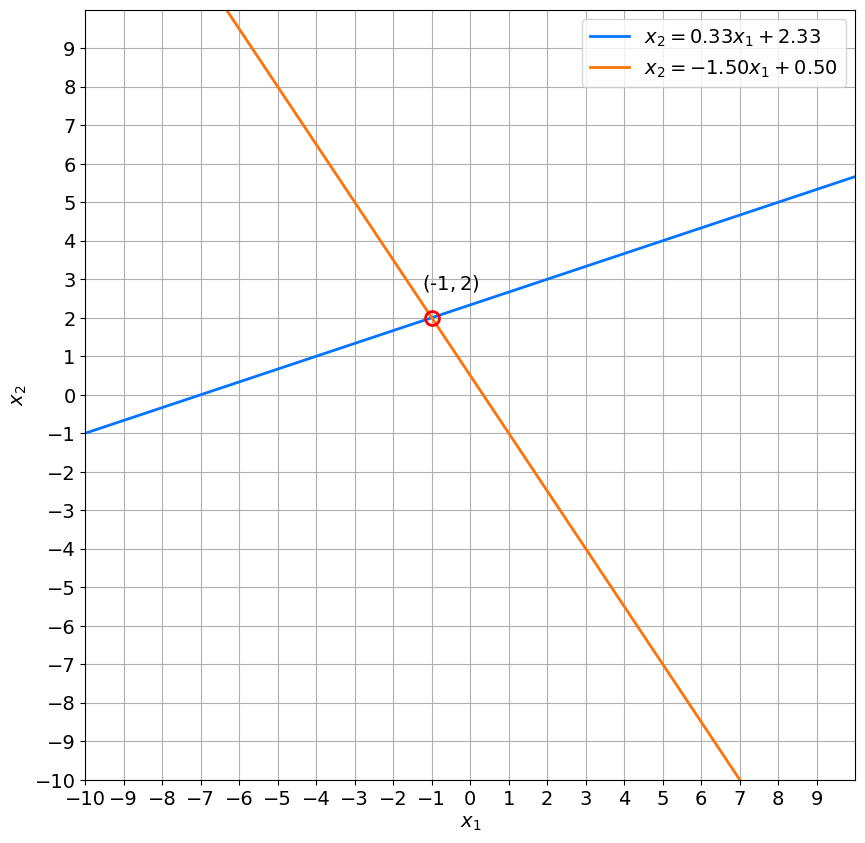

In [7]:
plot_lines(A_system)

$$\begin{cases} 
4x_1-3x_2+x_3=-10, \\ 2x_1+x_2+3x_3=0, \\ -x_1+2x_2-5x_3=17, \end{cases}\tag{1}$$

In [8]:
A = np.array([
        [4, -3, 1],
        [2, 1, 3],
        [-1, 2, -5]
    ], dtype=np.dtype(float))

b = np.array([-10, 0, 17], dtype=np.dtype(float))

x = np.linalg.solve(A, b)
print(f"Solution: {x}")

d = np.linalg.det(A)
print(f"Determinant of matrix A: {d:.2f}")

Solution: [ 1.  4. -2.]
Determinant of matrix A: -60.00


# Vectars #

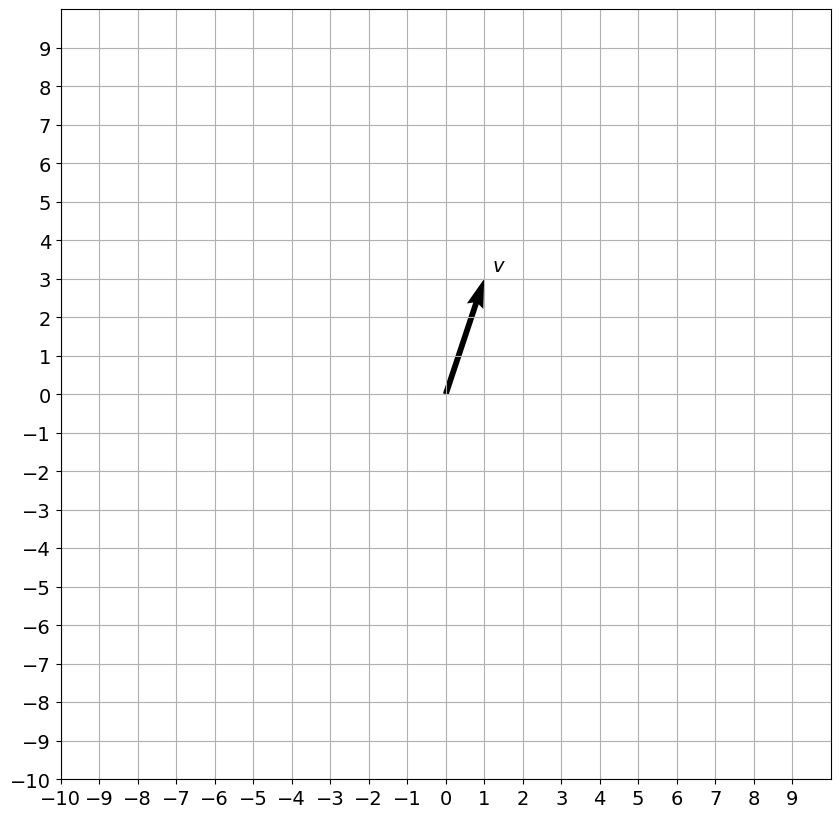

In [9]:


def plot_vectors(list_v, list_label, list_color):
    _, ax = plt.subplots(figsize=(10, 10))
    ax.tick_params(axis='x', labelsize=14)
    ax.tick_params(axis='y', labelsize=14)
    ax.set_xticks(np.arange(-10, 10))
    ax.set_yticks(np.arange(-10, 10))
    
    
    plt.axis([-10, 10, -10, 10])
    for i, v in enumerate(list_v):
        sgn = 0.4 * np.array([[1] if i==0 else [i] for i in np.sign(v)])
        plt.quiver(v[0], v[1], color=list_color[i], angles='xy', scale_units='xy', scale=1)
        ax.text(v[0]-0.2+sgn[0], v[1]-0.2+sgn[1], list_label[i], fontsize=14, color=list_color[i])

    plt.grid()
    plt.gca().set_aspect("equal")
    plt.show()

v = np.array([[1],[3]])
# Arguments: list of vectors as NumPy arrays, labels, colors.
plot_vectors([v], [f"$v$"], ["black"])

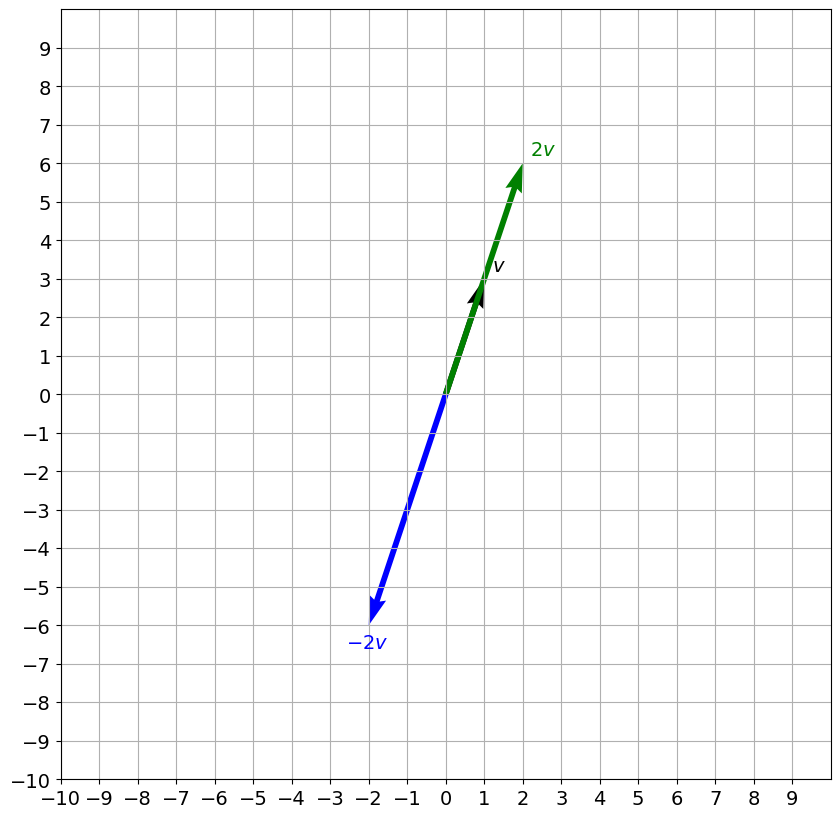

In [10]:
plot_vectors([v, 2*v, -2*v], [f"$v$", f"$2v$", f"$-2v$"], ["black", "green", "blue"])

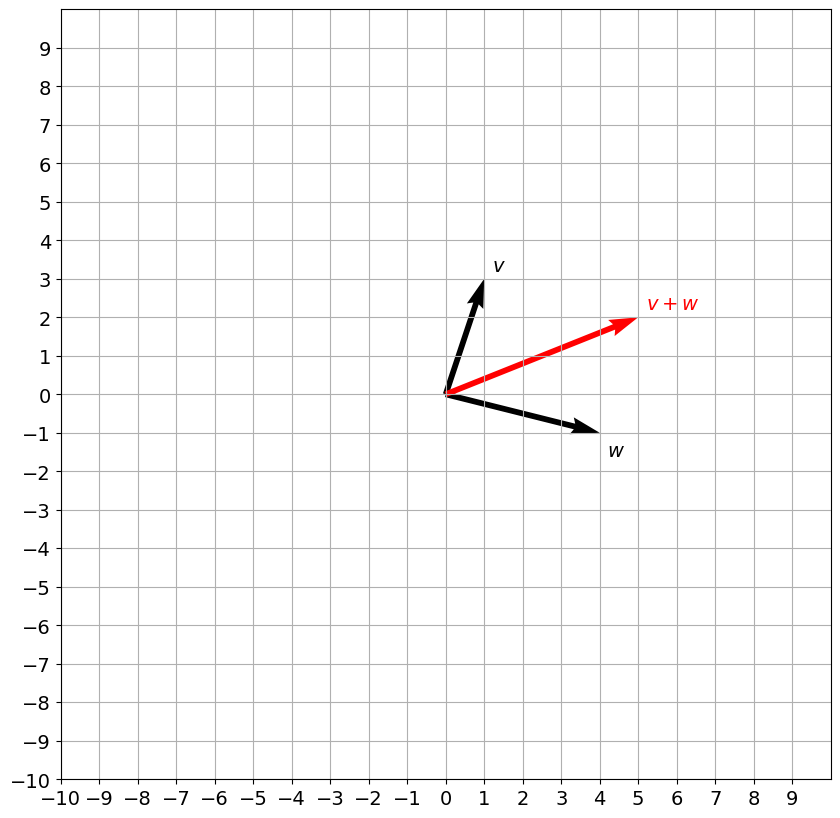

In [12]:
v = np.array([[1],[3]])
w = np.array([[4],[-1]])

#plot_vectors([v, w, v + w], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])
plot_vectors([v, w, np.add(v, w)], [f"$v$", f"$w$", f"$v + w$"], ["black", "black", "red"])

In [13]:
print("Norm of a vector v is", np.linalg.norm(v))

Norm of a vector v is 3.1622776601683795


# Vector Dot Product

$$x\cdot y = \sum_{i=1}^{n} x_iy_i = x_1y_1+x_2y_2+\ldots+x_ny_n \tag{1}$$

In [14]:
def dot(x, y):
    s=0
    for xi, yi in zip(x, y):
        s += xi * yi
    return s

x = [1, -2, -5]
y = [4, 3, -1]
print("The dot product of x and y is", dot(x, y))
print("np.dot(x,y) function returns dot product of x and y:", np.dot(x, y)) 

The dot product of x and y is 3
np.dot(x,y) function returns dot product of x and y: 3


# Matrix Multiplication

In [15]:
A = np.array([[4, 9, 9], [9, 1, 6], [9, 2, 3]])
print("Matrix A (3 by 3):\n", A)

B = np.array([[2, 2], [5, 7], [4, 4]])
print("Matrix B (3 by 2):\n", B)

print(np.matmul(A, B))
print(A @ B)

Matrix A (3 by 3):
 [[4 9 9]
 [9 1 6]
 [9 2 3]]
Matrix B (3 by 2):
 [[2 2]
 [5 7]
 [4 4]]
[[ 89 107]
 [ 47  49]
 [ 40  44]]
[[ 89 107]
 [ 47  49]
 [ 40  44]]
